# Fraud Detection

## Concept

In [109]:
## Concept

https://www.kaggle.com/code/sheemamasood/spending-habits-analysis-credit-card-transaction

https://www.kaggle.com/code/pavankumar4757/credit-card-fraud-detection

## imports and read in

In [110]:
import polars as pl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [111]:
df = pl.read_csv("data/credit_card_transactions.csv")

df.head()


Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
i64,str,i64,str,str,f64,str,str,str,str,str,str,i64,f64,f64,i64,str,str,str,i64,f64,f64,i64,i64
0,"""2019-01-01 00:00:18""",2703186189652095,"""fraud_Rippin, Kub and Mann""","""misc_net""",4.97,"""Jennifer""","""Banks""","""F""","""561 Perry Cove""","""Moravian Falls""","""NC""",28654,36.0788,-81.1781,3495,"""Psychologist, counselling""","""1988-03-09""","""0b242abb623afc578575680df30655…",1325376018,36.011293,-82.048315,0,28705
1,"""2019-01-01 00:00:44""",630423337322,"""fraud_Heller, Gutmann and Ziem…","""grocery_pos""",107.23,"""Stephanie""","""Gill""","""F""","""43039 Riley Greens Suite 393""","""Orient""","""WA""",99160,48.8878,-118.2105,149,"""Special educational needs teac…","""1978-06-21""","""1f76529f8574734946361c461b024d…",1325376044,49.159047,-118.186462,0,null
2,"""2019-01-01 00:00:51""",38859492057661,"""fraud_Lind-Buckridge""","""entertainment""",220.11,"""Edward""","""Sanchez""","""M""","""594 White Dale Suite 530""","""Malad City""","""ID""",83252,42.1808,-112.262,4154,"""Nature conservation officer""","""1962-01-19""","""a1a22d70485983eac12b5b88dad1cf…",1325376051,43.150704,-112.154481,0,83236
3,"""2019-01-01 00:01:16""",3534093764340240,"""fraud_Kutch, Hermiston and Far…","""gas_transport""",45.0,"""Jeremy""","""White""","""M""","""9443 Cynthia Court Apt. 038""","""Boulder""","""MT""",59632,46.2306,-112.1138,1939,"""Patent attorney""","""1967-01-12""","""6b849c168bdad6f867558c3793159a…",1325376076,47.034331,-112.561071,0,null
4,"""2019-01-01 00:03:06""",375534208663984,"""fraud_Keeling-Crist""","""misc_pos""",41.96,"""Tyler""","""Garcia""","""M""","""408 Bradley Rest""","""Doe Hill""","""VA""",24433,38.4207,-79.4629,99,"""Dance movement psychotherapist""","""1986-03-28""","""a41d7549acf90789359a9aa5346dcb…",1325376186,38.674999,-78.632459,0,22844


## Clean and analyse

### Global analysis

In [112]:
df = df.drop("Unnamed: 0")

In [113]:
df.describe()

statistic,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
str,str,f64,str,str,f64,str,str,str,str,str,str,f64,f64,f64,f64,str,str,str,f64,f64,f64,f64,f64
"""count""","""1296675""",1.296675e6,"""1296675""","""1296675""",1.296675e6,"""1296675""","""1296675""","""1296675""","""1296675""","""1296675""","""1296675""",1.296675e6,1.296675e6,1.296675e6,1.296675e6,"""1296675""","""1296675""","""1296675""",1.296675e6,1.296675e6,1.296675e6,1.296675e6,1.100702e6
"""null_count""","""0""",0.0,"""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""","""0""","""0""",0.0,0.0,0.0,0.0,195973.0
"""mean""",null,4.1719e17,null,null,70.351035,null,null,null,null,null,null,48800.671097,38.537622,-90.226335,88824.440563,null,null,null,1.3492e9,38.537338,-90.226465,0.005789,46825.754151
"""std""",null,1.3088e18,null,null,160.316039,null,null,null,null,null,null,26893.222476,5.075808,13.759077,301956.360689,null,null,null,1.2841e7,5.109788,13.771091,0.075863,25834.00116
"""min""","""2019-01-01 00:00:18""",6.0416e10,"""fraud_Abbott-Rogahn""","""entertainment""",1.0,"""Aaron""","""Abbott""","""F""","""000 Jennifer Mills""","""Achille""","""AK""",1257.0,20.0271,-165.6723,23.0,"""Academic librarian""","""1924-10-30""","""00000ecad06b03d3a8d34b4e30b5ce…",1.3254e9,19.027785,-166.671242,0.0,1001.0
"""25%""",null,1.8004e14,null,null,9.65,null,null,null,null,null,null,26237.0,34.6205,-96.798,743.0,null,null,null,1.3388e9,34.733575,-96.89723,0.0,25114.0
"""50%""",null,3.5214e15,null,null,47.52,null,null,null,null,null,null,48174.0,39.3543,-87.4769,2456.0,null,null,null,1.3492e9,39.36568,-87.438392,0.0,45860.0
"""75%""",null,4.6423e15,null,null,83.14,null,null,null,null,null,null,72042.0,41.9404,-80.158,20328.0,null,null,null,1.3594e9,41.957166,-80.236781,0.0,68319.0
"""max""","""2020-06-21 12:13:37""",4.9923e18,"""fraud_Zulauf LLC""","""travel""",28948.9,"""Zachary""","""Zuniga""","""M""","""99736 Rose Shoals Apt. 504""","""Zavalla""","""WY""",99783.0,66.6933,-67.9503,2.9067e6,"""Writer""","""2005-01-29""","""ffffef9d89e7d02d86efb1d2ba4de0…",1.3718e9,67.510267,-66.950902,1.0,99403.0


In [114]:
# Fill missing values in 'merch_zipcode' with -1
df = df.with_columns(pl.col("merch_zipcode").fill_null(-1))

In [115]:
df["is_fraud"].value_counts()

is_fraud,count
i64,u32
0,1289169
1,7506


In [116]:
df[['trans_date_trans_time', 'trans_num', 'unix_time', 'dob', 'first', 'last']].head()


trans_date_trans_time,trans_num,unix_time,dob,first,last
str,str,i64,str,str,str
"""2019-01-01 00:00:18""","""0b242abb623afc578575680df30655…",1325376018,"""1988-03-09""","""Jennifer""","""Banks"""
"""2019-01-01 00:00:44""","""1f76529f8574734946361c461b024d…",1325376044,"""1978-06-21""","""Stephanie""","""Gill"""
"""2019-01-01 00:00:51""","""a1a22d70485983eac12b5b88dad1cf…",1325376051,"""1962-01-19""","""Edward""","""Sanchez"""
"""2019-01-01 00:01:16""","""6b849c168bdad6f867558c3793159a…",1325376076,"""1967-01-12""","""Jeremy""","""White"""
"""2019-01-01 00:03:06""","""a41d7549acf90789359a9aa5346dcb…",1325376186,"""1986-03-28""","""Tyler""","""Garcia"""


In [117]:
[df.columns]

[['trans_date_trans_time',
  'cc_num',
  'merchant',
  'category',
  'amt',
  'first',
  'last',
  'gender',
  'street',
  'city',
  'state',
  'zip',
  'lat',
  'long',
  'city_pop',
  'job',
  'dob',
  'trans_num',
  'unix_time',
  'merch_lat',
  'merch_long',
  'is_fraud',
  'merch_zipcode']]

In [118]:
# import polars as pl
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd


# categorical_cols = [col for col in df.columns if df[col].dtype == pl.Utf8]

# for col in categorical_cols:
#     unique_vals = df[col].unique().to_list()  
#     mapping_dict = {val: idx for idx, val in enumerate(unique_vals)}  
#     df = df.with_columns(pl.col(col).map_dict(mapping_dict).cast(pl.Int64))  

# numeric_df = df.select([col for col in df.columns if df[col].dtype in [pl.Float64, pl.Int64, pl.Datetime]])
# numeric_df = numeric_df.to_pandas()

# numeric_df["trans_date_trans_time"] = pd.to_datetime(numeric_df["trans_date_trans_time"])
# numeric_df["hour"] = numeric_df["trans_date_trans_time"].dt.hour

# numeric_df = numeric_df.drop(columns=["first", "last", "trans_date_trans_time", "unix_time", "cc_num", "merch_zipcode", "trans_num"], errors="ignore")

# plt.figure(figsize=(12, 6))
# sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
# plt.show()


### Model Training and Eval Baseline

In [131]:
def plot_results(results, model_name="Model"):
    """Plot comprehensive visualization of model results."""
    #plt.style.use('seaborn')  # For better aesthetics
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(25, 20))
    gs = fig.add_gridspec(3, 3)
    
    # 1. Confusion Matrix
    ax1 = fig.add_subplot(gs[0, 0])
    cm = np.array(results['confusion_matrix'])
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    annot = np.array([f"{cm[i,j]}\n({cm_norm[i,j]:.1f}%)" for i in range(cm.shape[0]) 
                     for j in range(cm.shape[1])]).reshape(cm.shape)
    
    sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', ax=ax1,
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    ax1.set_title('Confusion Matrix')
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('True')
    
    # 2. ROC Curve
    if results['y_full_prob'] is not None:
        ax2 = fig.add_subplot(gs[0, 1])
        fpr, tpr, _ = roc_curve(results['y_true'], results['y_full_prob'])
        roc_auc = auc(fpr, tpr)
        
        ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.3f})')
        ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax2.set_xlim([0.0, 1.0])
        ax2.set_ylim([0.0, 1.05])
        ax2.set_xlabel('False Positive Rate')
        ax2.set_ylabel('True Positive Rate')
        ax2.set_title('ROC Curve')
        ax2.legend(loc='lower right')
    
    # 3. Precision-Recall Curve
    if results['y_full_prob'] is not None:
        ax3 = fig.add_subplot(gs[0, 2])
        precision, recall, thresholds = precision_recall_curve(results['y_true'], results['y_full_prob'])
        pr_auc = average_precision_score(results['y_true'], results['y_full_prob'])
        no_skill = results['y_true'].mean()
        
        ax3.plot(recall, precision, color='blue', lw=2, label=f'PR (AP = {pr_auc:.3f})')
        ax3.axhline(y=no_skill, color='red', linestyle='--', label=f'No Skill ({no_skill:.3f})')
        ax3.set_xlim([0.0, 1.0])
        ax3.set_ylim([0.0, 1.05])
        ax3.set_xlabel('Recall')
        ax3.set_ylabel('Precision')
        ax3.set_title('Precision-Recall Curve')
        ax3.legend(loc='upper right')
        
        # Mark optimal threshold
        if 'optimal_threshold' in results:
            opt_idx = np.argmin(np.abs(thresholds - results['optimal_threshold']))
            ax3.plot(recall[opt_idx], precision[opt_idx], 'go', 
                    label=f'Opt Thresh ({results["optimal_threshold"]:.3f})')
            ax3.legend()
    
    # 4. Threshold Analysis
    if results['y_full_prob'] is not None:
        ax4 = fig.add_subplot(gs[1, :2])
        thresh_metrics = []
        threshold_values = np.linspace(0.05, 0.95, 19)
        
        for thresh in threshold_values:
            y_pred = (results['y_full_prob'] >= thresh).astype(int)
            cm = confusion_matrix(results['y_true'], y_pred)
            tn, fp, fn, tp = cm.ravel()
            prec = tp / (tp + fp) if (tp + fp) > 0 else 0
            rec = tp / (tp + fn) if (tp + fn) > 0 else 0
            thresh_metrics.append({'threshold': thresh, 'precision': prec, 'recall': rec,
                                 'f1': 2 * prec * rec / (prec + rec) if (prec + rec) > 0 else 0})
        
        thresh_df = pd.DataFrame(thresh_metrics)
        ax4.plot(thresh_df['threshold'], thresh_df['precision'], 'b-', label='Precision')
        ax4.plot(thresh_df['threshold'], thresh_df['recall'], 'g-', label='Recall')
        ax4.plot(thresh_df['threshold'], thresh_df['f1'], 'r-', label='F1 Score')
        if 'optimal_threshold' in results:
            ax4.axvline(x=results['optimal_threshold'], color='purple', linestyle='--',
                       label=f'Optimal ({results["optimal_threshold"]:.3f})')
        ax4.set_xlabel('Threshold')
        ax4.set_ylabel('Score')
        ax4.set_title('Performance Metrics by Threshold')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
    
    # # 5. SHAP Summary Plot
    # if 'shap_values' in results:
    #     ax5 = fig.add_subplot(gs[1, 2])
    #     shap.summary_plot(results['shap_values'], results['X_shap'], 
    #                      feature_names=results['X_shap'].columns.tolist(), show=False)
    #     ax5.set_title('SHAP Summary Plot')
    
    # 6. SHAP Bar Plot (Feature Importance)
    if 'feature_importance' in results:
        ax6 = fig.add_subplot(gs[2, :])
        feat_imp = pd.DataFrame(results['feature_importance']).head(10)  # Top 10 features
        sns.barplot(x='Importance', y='Feature', data=feat_imp, ax=ax6)
        ax6.set_title('Top 10 Feature Importance (SHAP)')
        ax6.set_xlabel('Mean Absolute SHAP Value')
    
    plt.suptitle(f"{model_name} Evaluation Results", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    results['all_plots'] = plt  # Store the figure for later use
    
    return plt

In [132]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, precision_score, recall_score,
    f1_score, roc_auc_score, precision_recall_curve, average_precision_score,
    roc_curve, auc
)
import shap
from joblib import dump
import logging
from tqdm.auto import tqdm
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import copy

def train_and_evaluate_model(
    df,
    model,
    target_col="is_fraud",
    n_splits=5,
    test_size=0.2,
    use_cv=True,
    precision_threshold=0.75,
    metrics=['precision', 'recall', 'f1', 'roc_auc', 'average_precision'],
    random_state=42,
    save_model_path=None,
    feature_names=None,
    handle_imbalance=True,
    imbalance_method='rus',
    class_weight=None
):
    logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
    logger = logging.getLogger(__name__)
    
    start_time = time.time()
    results = {}
    
    if 'polars' in str(type(df)):
        df = df.to_pandas()
    
    if target_col not in df.columns:
        raise ValueError(f"Target column '{target_col}' not found")
    
    class_counts = df[target_col].value_counts()
    class_ratio = class_counts.min() / class_counts.max()
    logger.info(f"Class distribution: {class_counts.to_dict()}")
    results['class_distribution'] = class_counts.to_dict()
    
    X = df.drop(columns=[target_col])
    y = df[target_col]
    if feature_names is None:
        feature_names = X.columns.tolist()
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    results['scaler'] = scaler
    
    if class_weight is None and hasattr(model, 'class_weight'):
        class_weight = {0: 2.0, 1: 1.0}
        logger.info(f"Optimized class_weight for precision: {class_weight}")
    
    if class_weight and hasattr(model, 'set_params'):
        model.set_params(class_weight=class_weight)
    
    if handle_imbalance and imbalance_method == 'rus':
        imbalance_handler = RandomUnderSampler(random_state=random_state)
        model_orig = copy.deepcopy(model)
        model = ImbPipeline([
            ('resampler', imbalance_handler),
            ('model', model)
        ])
        logger.info("Using RandomUnderSampler for precision focus")
    
    is_tree_model = any(model_type in str(type(model)).lower() for model_type in 
                       ['randomforest', 'gradientboosting', 'xgb', 'lgbm', 'catboost'])
    
    all_metrics = {}
    
    if use_cv:
        logger.info(f"Performing {n_splits}-fold CV with precision focus")
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
        scoring = {metric: metric for metric in metrics}
        
        cv_results = cross_validate(
            model, X_scaled, y, cv=skf, scoring=scoring,
            return_train_score=True, return_estimator=True
        )
        
        for metric in metrics:
            all_metrics[f'cv_{metric}_test'] = {
                'mean': cv_results[f'test_{metric}'].mean(),
                'std': cv_results[f'test_{metric}'].std()
            }
        
        final_model = cv_results['estimator'][-1]
        model.fit(X_scaled, y)
    
    else:
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=test_size, stratify=y, random_state=random_state
        )
        
        model.fit(X_train, y_train)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
        y_pred = (y_prob >= precision_threshold).astype(int) if y_prob is not None else model.predict(X_test)
        
        all_metrics['precision'] = precision_score(y_test, y_pred)
        all_metrics['recall'] = recall_score(y_test, y_pred)
        all_metrics['f1'] = f1_score(y_test, y_pred)
        if y_prob is not None:
            all_metrics['roc_auc'] = roc_auc_score(y_test, y_prob)
            all_metrics['average_precision'] = average_precision_score(y_test, y_prob)
        
        final_model = model
    
    y_full_prob = model.predict_proba(X_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    y_full_pred = (y_full_prob >= precision_threshold).astype(int) if y_full_prob is not None else model.predict(X_scaled)
    
    results['confusion_matrix'] = confusion_matrix(y, y_full_pred).tolist()
    results['classification_report'] = classification_report(y, y_full_pred, output_dict=True)
    results['y_full_prob'] = y_full_prob  # Store for plotting
    
    if y_full_prob is not None:
        precision, recall, thresholds = precision_recall_curve(y, y_full_prob)
        valid_idx = np.where(precision >= 0.8)[0]
        if len(valid_idx) > 0:
            opt_idx = valid_idx[np.argmax(recall[valid_idx])]
            optimal_threshold = thresholds[opt_idx]
            results['optimal_threshold'] = float(optimal_threshold)
            logger.info(f"Optimal threshold for precision >= 0.8: {optimal_threshold:.3f}")
        else:
            optimal_threshold = precision_threshold
    
    #if is_tree_model:
    try:
        shap_model = model.named_steps['model'] if hasattr(model, 'named_steps') else model
        explainer = shap.TreeExplainer(shap_model)
        X_shap_scaled = X_scaled[:10000] if X_scaled.shape[0] > 10000 else X_scaled
        shap_values = explainer.shap_values(X_shap_scaled)
        
        if isinstance(shap_values, list):
            shap_values = shap_values[1]
        
        shap_importance = pd.DataFrame({
            'Feature': feature_names,
            'Importance': np.abs(shap_values).mean(0)
        }).sort_values('Importance', ascending=False)
        results['feature_importance'] = shap_importance.to_dict('records')
        results['shap_values'] = shap_values  # Store for plotting
        results['X_shap'] = X.iloc[:10000] if X.shape[0] > 10000 else X

    except Exception as e:
        logger.warning(f"SHAP calculation failed: {str(e)}")

    if save_model_path:
        dump(model, save_model_path)
    
    results['metrics'] = all_metrics
    results['execution_time'] = time.time() - start_time
    results['model'] = model
    results['X_scaled'] = X_scaled  # Store for plotting
    results['y_true'] = y  # Store for plotting
    
    logger.info(f"Precision-focused training completed in {results['execution_time']:.2f}s")
    return results


def evaluate_multiple_models(
    df,
    models_dict,
    target_col="is_fraud",
    handle_imbalance=True,
    imbalance_methods=['rus'],
    **kwargs
):
    results = {}
    comparison_df = pd.DataFrame()
    
    for name, model in models_dict.items():
        for method in imbalance_methods:
            config_name = f"{name} ({method.upper()})"
            model_results = train_and_evaluate_model(
                df=df,
                model=copy.deepcopy(model),
                target_col=target_col,
                handle_imbalance=handle_imbalance,
                imbalance_method=method,
                **kwargs
            )
            results[config_name] = model_results
            
            metrics = {k: v['mean'] if isinstance(v, dict) else v for k, v in model_results['metrics'].items()}

            metrics_series = pd.Series(metrics, name=config_name)

            comparison_df = pd.concat([comparison_df, metrics_series], axis=1)
            
            # Generate plots for each model
            plot_results(model_results, config_name)
            plt.show()
    comparison_df = comparison_df.T
    results['comparison'] = comparison_df
    
    best_model = comparison_df['precision'].idxmax()
    results['best_model'] = {
        'name': best_model,
        'precision': comparison_df.loc[best_model, 'precision']
    }
    
    print(f"Best model for precision: {best_model} (Precision: {results['best_model']['precision']:.4f})")
    return results



In [121]:
df = df.with_columns(pl.col("trans_date_trans_time").str.to_datetime("%Y-%m-%d %H:%M:%S"))

holdout = df.filter(pl.col("trans_date_trans_time") > pl.lit("2020-06-01").str.to_datetime("%Y-%m-%d"))
df = df.filter(pl.col("trans_date_trans_time") <= pl.lit("2020-06-01").str.to_datetime("%Y-%m-%d"))

categorical_cols = [col for col in df.columns if df[col].dtype == pl.Utf8]

for col in categorical_cols:
    unique_vals = df[col].unique().to_list()  
    mapping_dict = {val: idx for idx, val in enumerate(unique_vals)}  
    df = df.with_columns(pl.col(col).map_dict(mapping_dict).cast(pl.Int64))  
    holdout = holdout.with_columns(pl.col(col).map_dict(mapping_dict).cast(pl.Int64))  



C:\Users\BenPalay\AppData\Local\Temp\ipykernel_29200\988111088.py:11: DeprecationWarning: `map_dict` is deprecated. It has been renamed to `replace`. The default behavior has changed to keep any values not present in the mapping unchanged. Pass `default=None` to keep existing behavior.
  df = df.with_columns(pl.col(col).map_dict(mapping_dict).cast(pl.Int64))
C:\Users\BenPalay\AppData\Local\Temp\ipykernel_29200\988111088.py:12: DeprecationWarning: `map_dict` is deprecated. It has been renamed to `replace`. The default behavior has changed to keep any values not present in the mapping unchanged. Pass `default=None` to keep existing behavior.
  holdout = holdout.with_columns(pl.col(col).map_dict(mapping_dict).cast(pl.Int64))


In [122]:
df = df.drop(["first", "last", "trans_date_trans_time", "unix_time", "cc_num", "merch_zipcode", "trans_num"])
holdout = holdout.drop(["first", "last", "trans_date_trans_time", "unix_time", "cc_num", "merch_zipcode", "trans_num"])

2025-02-25 15:18:03,614 - INFO - Class distribution: {0: 1231756, 1: 7172}
2025-02-25 15:18:04,148 - INFO - Using RandomUnderSampler for precision focus
2025-02-25 15:18:07,731 - INFO - Optimal threshold for precision >= 0.8: 1.000
2025-02-25 15:18:08,304 - INFO - Precision-focused training completed in 4.74s


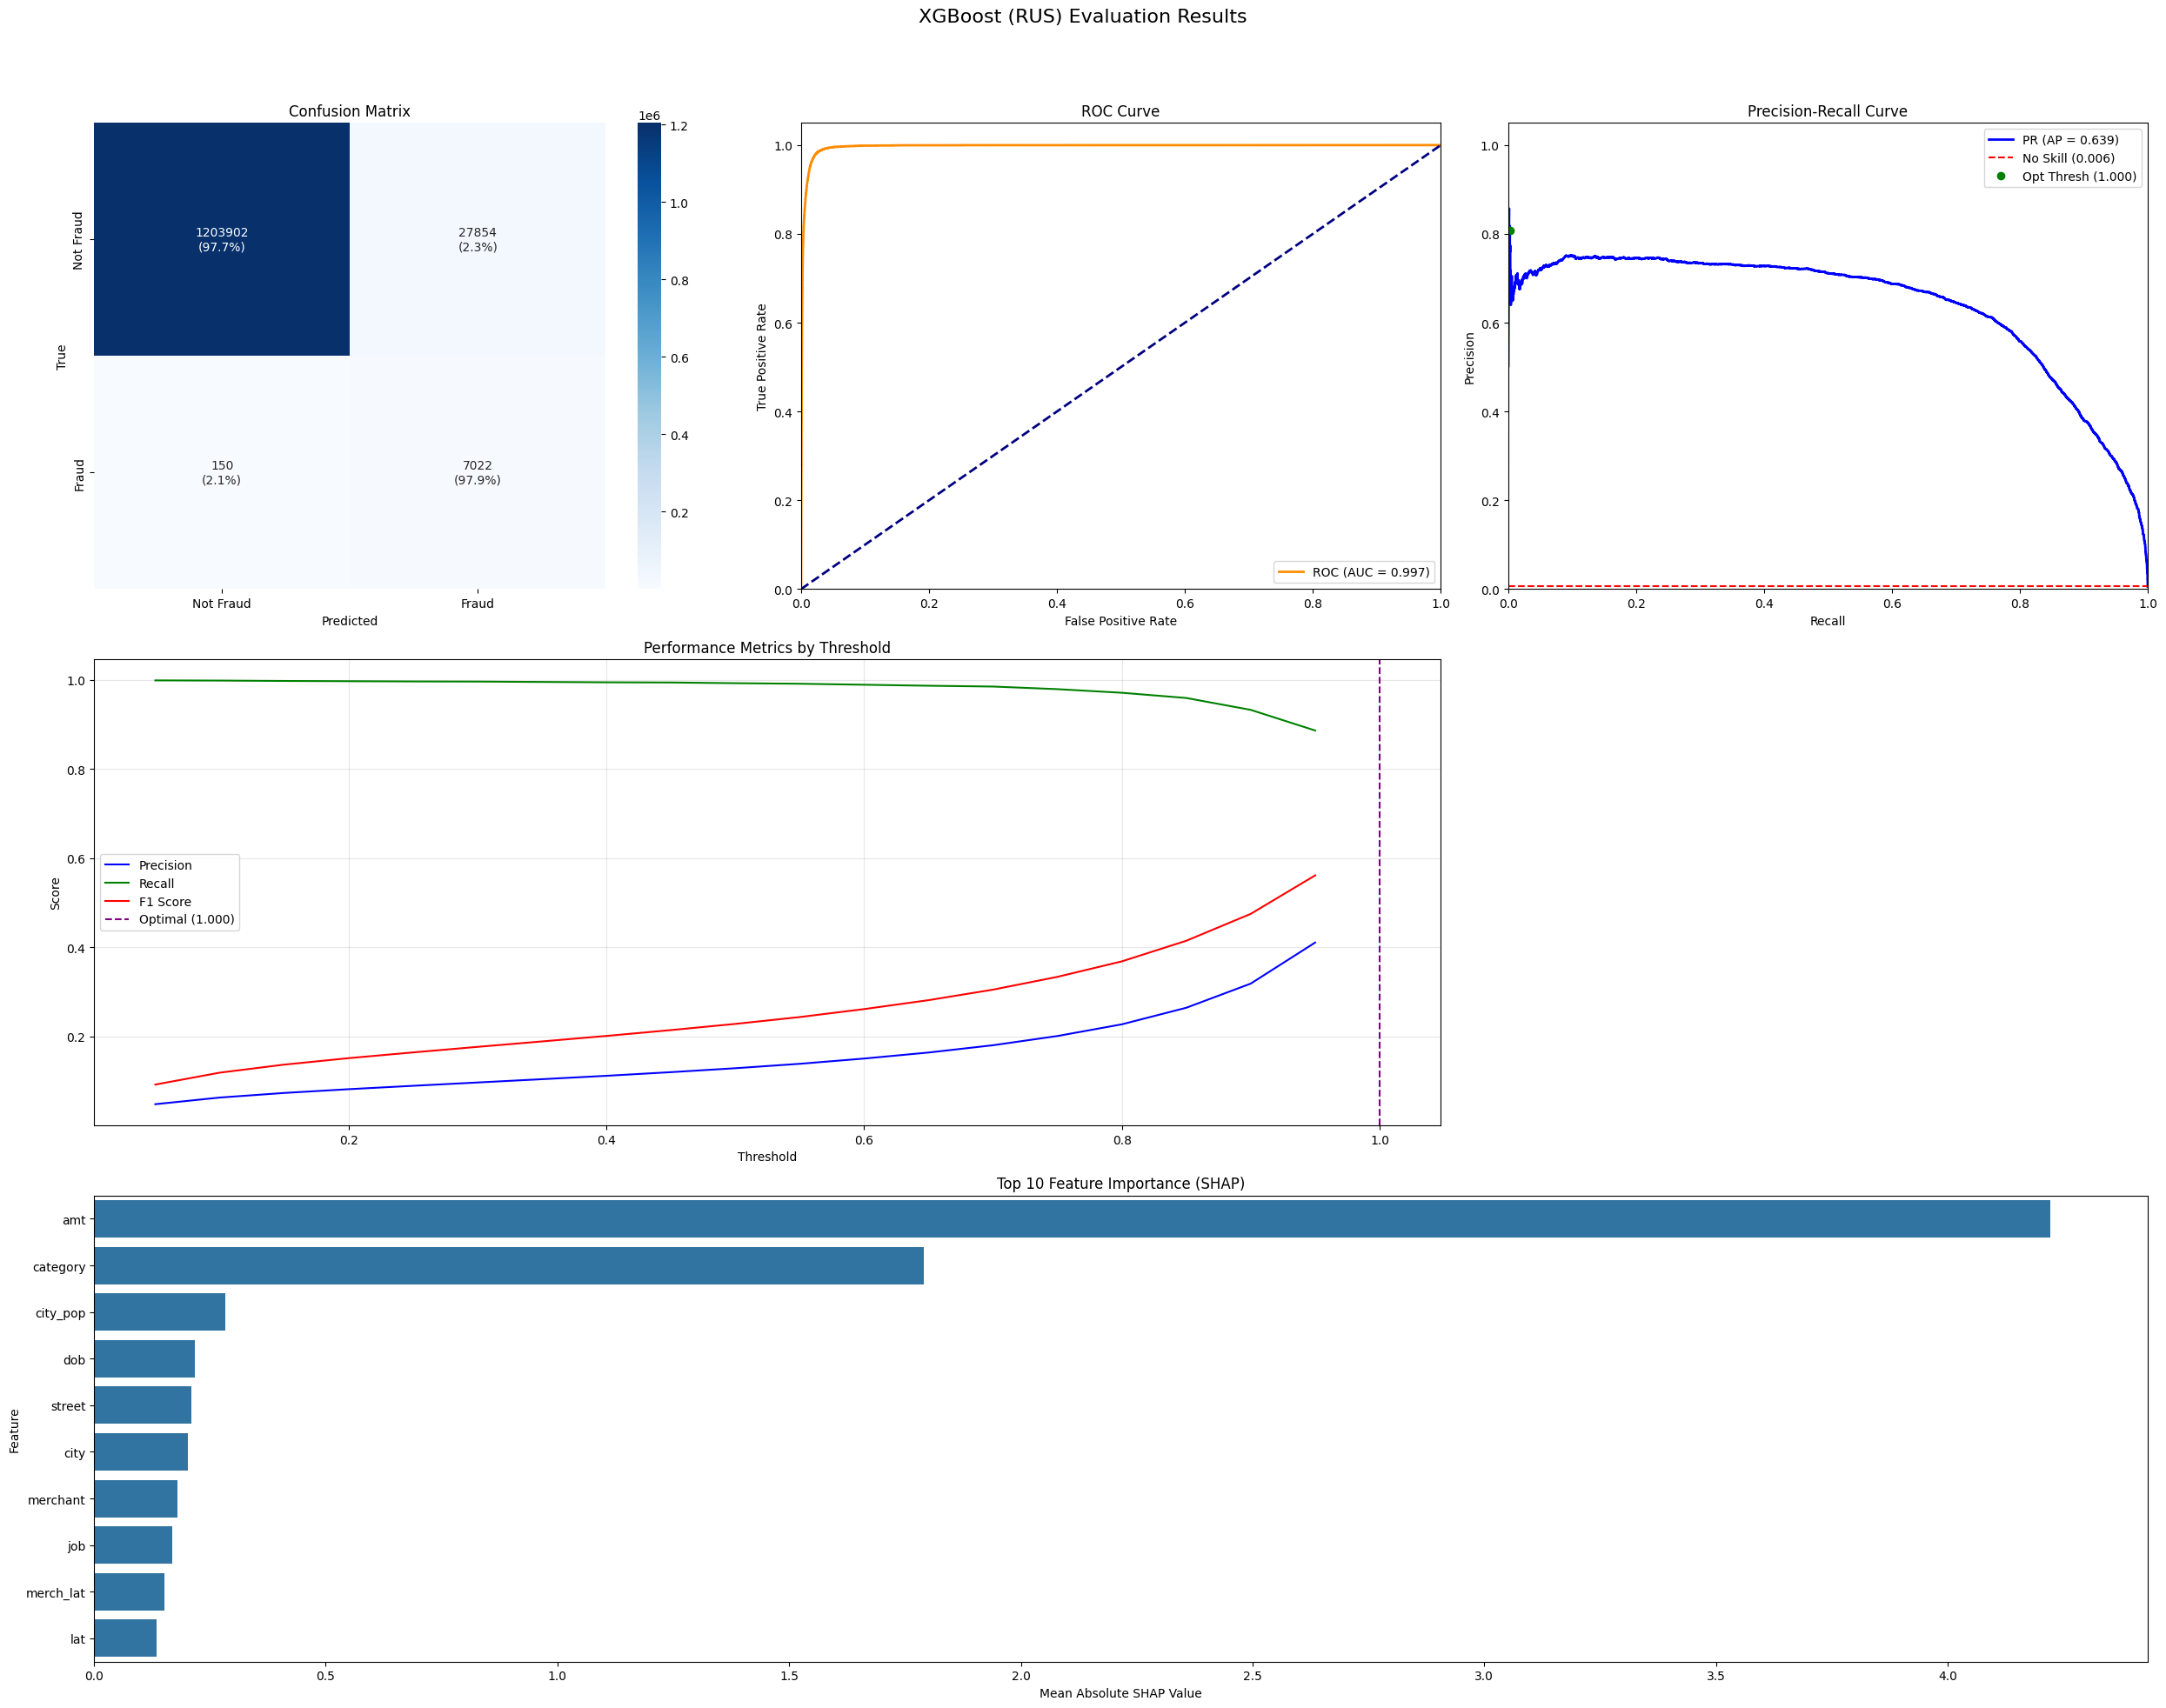

Best model for precision: XGBoost (RUS) (Precision: 0.1908)


In [133]:


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import cross_validate


models = {
    #"Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    #"Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    # "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42)
}

results = evaluate_multiple_models(
    df=df,
    models_dict=models,
    target_col="is_fraud",
    handle_imbalance=True,
    imbalance_methods=['rus'],  # Added Random Under Sampling
    n_splits=2,
    use_cv=False
)




In [124]:
# Access the best model
best_model_name = results['best_model']['name']
best_model = results[best_model_name]['model']
best_model

Pipeline(steps=[('resampler', RandomUnderSampler(random_state=42)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

Precision: 0.0757
Recall: 0.7365
F1 Score: 0.1372
ROC AUC: 0.8421
Average Precision: 0.0573


<Axes: >

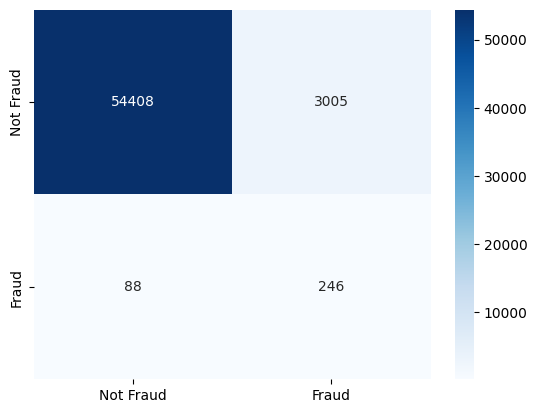

In [134]:
## Predict on holdout data
holdout_df = holdout.to_pandas()
target_col = "is_fraud"
X = holdout_df.drop(columns=[target_col])
y = holdout_df[target_col]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_pred = best_model.predict(X_scaled)


# Evaluate the model on holdout_df data
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred)
average_precision = average_precision_score(y, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Average Precision: {average_precision:.4f}")

# plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])

## Feature Engineering

In [ ]:
# Convert transaction_date to datetime
df = df.with_columns(pl.col("trans_date_trans_time").str.to_datetime("%Y-%m-%d %H:%M:%S"))

### Create future test set

In [ ]:
holdout = df.filter(pl.col("trans_date_trans_time") > pl.lit("2020-06-01").str.to_datetime("%Y-%m-%d"))
df = df.filter(pl.col("trans_date_trans_time") <= pl.lit("2020-06-01").str.to_datetime("%Y-%m-%d"))

In [ ]:

df = df.sort(["cc_num", "trans_date_trans_time"])

# Step 2: Compute cumulative statistics up to each transaction
df = df.with_columns([
    pl.col("amt").cumsum().over("cc_num").alias("total_spent"),
    #pl.col("amt").cummean().over("cc_num").alias("avg_transaction_amt"),
    pl.col("amt").cumcount().over("cc_num").alias("num_transactions"),
])

# Step 3: Compute rolling 30-day aggregates for the last 6 months (6 windows)
rolling_agg_df = (
    df.group_by_dynamic(
        index_column="trans_date_trans_time", every="30d", by="cc_num", closed="right"
    )
    .agg(pl.col("amt").sum().alias("30d_sum"))
    .with_columns(
        pl.col("trans_date_trans_time")
        .rank(descending=True)
        .over("cc_num")
        .alias("window_rank")  # Rank 1 = most recent, 6 = oldest in last 6 months
    )
    .filter(pl.col("window_rank") <= 6)  # Keep only last 6 rolling windows
    .pivot(
        values="30d_sum",
        index=["cc_num", "trans_date_trans_time"],
        columns="window_rank",
        aggregate_function="first"
    )
)
rolling_agg_df.describe()


C:\Users\BenPalay\AppData\Local\Temp\ipykernel_26540\2509509780.py:5: DeprecationWarning: `cumsum` is deprecated. It has been renamed to `cum_sum`.
  pl.col("amt").cumsum().over("cc_num").alias("total_spent"),
C:\Users\BenPalay\AppData\Local\Temp\ipykernel_26540\2509509780.py:7: DeprecationWarning: `cumcount` is deprecated. It has been renamed to `cum_count`.
  pl.col("amt").cumcount().over("cc_num").alias("num_transactions"),
C:\Users\BenPalay\AppData\Local\Temp\ipykernel_26540\2509509780.py:12: DeprecationWarning: `the argument by` for `group_by_dynamic` is deprecated. It has been renamed to `group_by`.
  df.group_by_dynamic(


statistic,cc_num,trans_date_trans_time,6.0,5.0,4.0,3.0,2.0,1.0
str,f64,str,f64,f64,f64,f64,f64,f64
"""count""",5529.0,"""5529""",908.0,908.0,908.0,908.0,916.0,981.0
"""null_count""",0.0,"""0""",4621.0,4621.0,4621.0,4621.0,4613.0,4548.0
"""mean""",4.1371e17,"""2020-02-20 08:07:33.174172""",8499.543557,3901.208007,4236.379626,5419.345661,5143.035731,4569.619521
"""std""",1.3001e18,null,5333.130242,2652.069908,2938.547647,3441.27535,3316.161691,2990.660908
"""min""",6.0416e10,"""2018-12-15 00:00:00""",1316.33,422.17,358.41,476.44,581.93,466.84
"""25%""",1.8004e14,"""2020-01-09 00:00:00""",4596.48,1904.83,2046.13,2823.79,2526.35,2340.92
"""50%""",3.5238e15,"""2020-02-08 00:00:00""",7644.59,3426.13,3573.18,4842.2,4571.94,3985.24
"""75%""",4.6539e15,"""2020-04-08 00:00:00""",10803.71,5000.27,5708.13,7054.82,6733.95,6132.03
"""max""",4.9923e18,"""2020-05-08 00:00:00""",30351.75,17053.51,22117.9,22771.86,20406.09,28526.2


In [ ]:
rename_dict = {
    col: f"30d_window_{int(float(col))}"  # Convert "1.0" -> "30d_window_1", etc.
    for col in rolling_agg_df.columns
    if col not in ["cc_num", "trans_date_trans_time"]  # Skip index columns
}
rolling_agg_df = rolling_agg_df.rename(rename_dict)

In [ ]:
df = df.join(rolling_agg_df, on=["cc_num", "trans_date_trans_time"], how="left")

    
df.describe()

statistic,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,total_spent,num_transactions,30d_window_6,30d_window_5,30d_window_4,30d_window_3,30d_window_2,30d_window_1
str,str,f64,str,str,f64,str,str,str,str,str,str,f64,f64,f64,f64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""1238928""",1.238928e6,"""1238928""","""1238928""",1.238928e6,"""1238928""","""1238928""","""1238928""","""1238928""","""1238928""","""1238928""",1.238928e6,1.238928e6,1.238928e6,1.238928e6,"""1238928""","""1238928""","""1238928""",1.238928e6,1.238928e6,1.238928e6,1.238928e6,1.238928e6,1.238928e6,1.238928e6,0.0,0.0,0.0,0.0,0.0,0.0
"""null_count""","""0""",0.0,"""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.238928e6,1.238928e6,1.238928e6,1.238928e6,1.238928e6,1.238928e6
"""mean""","""2019-09-21 19:31:56.940022""",4.1729e17,null,null,70.315179,null,null,null,null,null,null,48801.844638,38.537294,-90.227502,88898.622217,null,null,null,1.3482e9,38.537167,-90.22765,0.005789,39751.959105,60655.700488,869.45306,null,null,null,null,null,null
"""std""",null,1.3089e18,null,null,159.855032,null,null,null,null,null,null,26890.26946,5.076812,13.759518,302037.303649,null,null,null,1.2234e7,5.110788,13.771604,0.075864,29115.017935,47930.673695,647.709963,null,null,null,null,null,null
"""min""","""2019-01-01 00:00:18""",6.0416e10,"""fraud_Abbott-Rogahn""","""entertainment""",1.0,"""Aaron""","""Abbott""","""F""","""000 Jennifer Mills""","""Achille""","""AK""",1257.0,20.0271,-165.6723,23.0,"""Academic librarian""","""1924-10-30""","""00000ecad06b03d3a8d34b4e30b5ce…",1.3254e9,19.027785,-166.671242,0.0,-1.0,1.03,1.0,null,null,null,null,null,null
"""25%""","""2019-05-30 06:46:10""",1.8004e14,null,null,9.65,null,null,null,null,null,null,26237.0,34.6205,-96.798,743.0,null,null,null,1.3384e9,34.733892,-96.892968,0.0,14081.0,23258.08,341.0,null,null,null,null,null,null
"""50%""","""2019-09-20 21:16:45""",3.5214e15,null,null,47.48,null,null,null,null,null,null,48174.0,39.3543,-87.4769,2456.0,null,null,null,1.3482e9,39.365214,-87.438882,0.0,38488.0,50253.89,743.0,null,null,null,null,null,null
"""75%""","""2020-01-04 04:15:38""",4.6423e15,null,null,83.11,null,null,null,null,null,null,72011.0,41.9404,-80.158,20328.0,null,null,null,1.3573e9,41.957095,-80.237862,0.0,64098.0,86916.72,1283.0,null,null,null,null,null,null
"""max""","""2020-05-31 23:58:36""",4.9923e18,"""fraud_Zulauf LLC""","""travel""",28948.9,"""Zachary""","""Zuniga""","""M""","""99736 Rose Shoals Apt. 504""","""Zavalla""","""WY""",99783.0,66.6933,-67.9503,2.9067e6,"""Writer""","""2005-01-29""","""ffffdd4a4136ac60e6a12e15c50be2…",1.3700e9,67.510267,-66.950902,1.0,99403.0,284204.73,2988.0,null,null,null,null,null,null
